# Uneven spectral window estimate

The goal of this notebook is to calculate a version of the database with spws with non-uniform spectral resolution. In other words, some spws will have high spectral resolution and some will have low spectral resolution. I'm referring to this case as the "uneven spw" case. I'm going to do this as a delta on the original estimates, similar to bands 1 and 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, QTable, vstack
import astropy.units as u
from importlib import reload
import wsu_plots
import wsu_db
import large_cubes
import pickle

## reading in the data

In [2]:
# versions enforcing min nbin
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20231212_without_band3_nbin3_npol4.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20231212_without_band3_nbin3_npol4.ecsv')

In [3]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [4]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [5]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [97]:
# reading in the per source version to check
result_c7_src = QTable.read('data/wsu_datarates_per_mous_src_cycle7_20231212_without_band3_nbin3_npol4.ecsv') 
result_c8_src = QTable.read('data/wsu_datarates_per_mous_src_cycle8_20231212_without_band3_nbin3_npol4.ecsv') 

In [98]:
wsu_all_src = vstack([result_c7_src,result_c8_src])

## Creating uneven spw estimate

In [118]:
reload(wsu_db)
wsu_db.calc_uneven_spw_estimate(wsu_all, frac_low_spw=0.5, frac_with_uneven_spw=0.5)

In [119]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

## Checking the results

In [120]:
idx = wsu_all['wsu_uneven_samp'] == True
wsu_all[idx]['wsu_velres_stepped2','wsu_velres_low','wsu_velres_high']

wsu_velres_stepped2,wsu_velres_low,wsu_velres_high
km / s,km / s,km / s
float64,float64,float64
0.49397357286819993,1.991828922855645,0.49397357286819993
0.4939735372896917,1.9918287793939182,0.4939735372896917
0.4939735376549216,1.9918287808666195,0.4939735376549216
0.4939735173370511,1.991828698939722,0.4939735173370511
0.49397357043853,1.9918289130585891,0.49397357043853
0.49397352207169065,1.9918287180310106,0.49397352207169065
...,...,...
0.13836987791828675,0.49813156050583235,0.13836987791828675


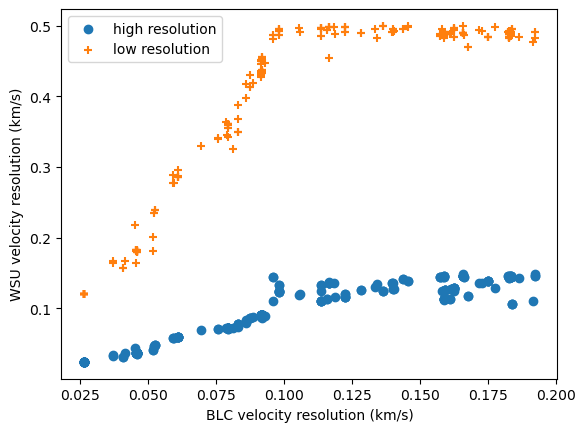

In [121]:
idx = (wsu_all['wsu_uneven_samp'] == True) & (wsu_all['blc_velres']<0.2 *u.km/u.s) 
#plt.scatter(wsu_all[idx]['blc_velres'],wsu_all[idx]['wsu_velres_stepped2'],label='stepped2')
plt.scatter(wsu_all[idx]['blc_velres'],wsu_all[idx]['wsu_velres_high'],marker='o',label='high resolution')
plt.scatter(wsu_all[idx]['blc_velres'],wsu_all[idx]['wsu_velres_low'],marker='+',label='low resolution')
plt.xlabel('BLC velocity resolution (km/s)')
plt.ylabel('WSU velocity resolution (km/s)')
plt.legend()

(array([131.,   2.,   7.,   1.,   0.,   6.,   0.,   2.,   0.,   2.]),
 array([0.2       , 0.20962961, 0.21925922, 0.22888883, 0.23851844,
        0.24814805, 0.25777766, 0.26740727, 0.27703688, 0.28666649,
        0.2962961 ]),
 <BarContainer object of 10 artists>)

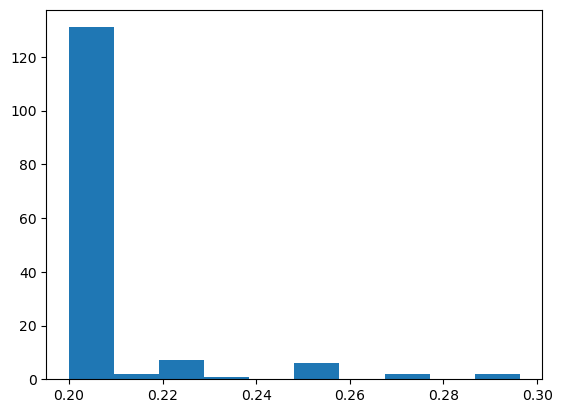

In [122]:
idx = (wsu_all['wsu_uneven_samp'] == True) & (wsu_all['blc_velres']<0.1 *u.km/u.s) 
ratio = wsu_all[idx]['wsu_velres_high'].value/wsu_all[idx]['wsu_velres_low'].value
plt.hist(ratio)

In [123]:
idx = (wsu_all['wsu_uneven_samp'] == True) & (wsu_all['blc_velres']<0.11 *u.km/u.s) & (wsu_all['wsu_velres_low'] < wsu_all['wsu_velres_high'])
wsu_all[idx]['blc_velres','wsu_velres_low','wsu_velres_high']

blc_velres,wsu_velres_low,wsu_velres_high
km / s,km / s,km / s
float64,float64,float64


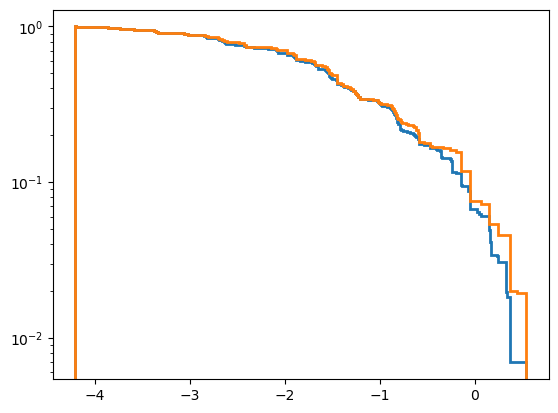

In [124]:
myval = plt.hist(np.log10(wsu_all['wsu_datarate_later_4x_uneven_typical'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_datarate_later_4x_stepped2_typical'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')

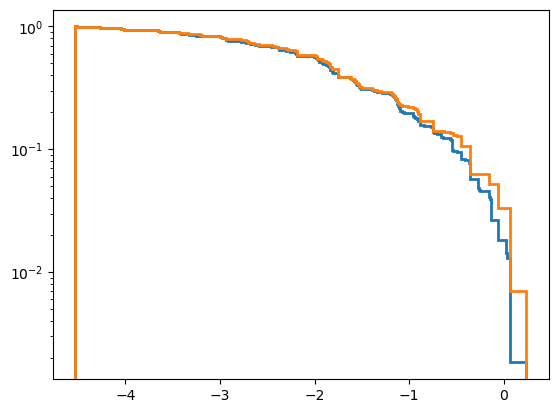

In [125]:
myval = plt.hist(np.log10(wsu_all['wsu_datarate_early_uneven_typical'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_datarate_early_stepped2_typical'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')

(array([ 942.,  209.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4041.]),
 array([0.599973 , 0.6399757, 0.6799784, 0.7199811, 0.7599838, 0.7999865,
        0.8399892, 0.8799919, 0.9199946, 0.9599973, 1.       ]),
 <BarContainer object of 10 artists>)

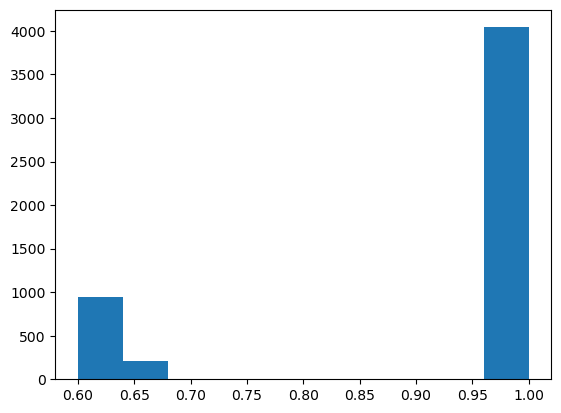

In [126]:
ratio = (wsu_all['wsu_datarate_early_uneven_typical'].value)/(wsu_all['wsu_datarate_early_stepped2_typical'].value)
plt.hist(ratio)

(array([ 942.,  209.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4041.]),
 array([0.599973 , 0.6399757, 0.6799784, 0.7199811, 0.7599838, 0.7999865,
        0.8399892, 0.8799919, 0.9199946, 0.9599973, 1.       ]),
 <BarContainer object of 10 artists>)

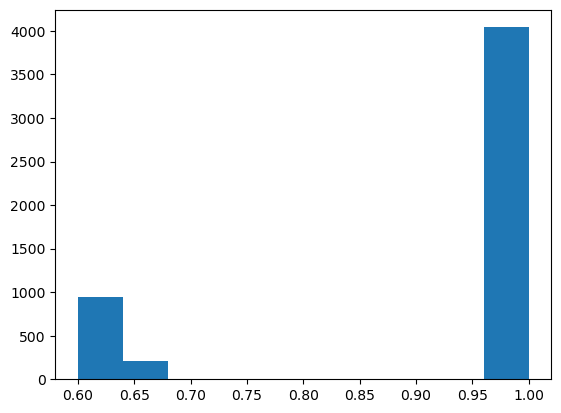

In [127]:
ratio = (wsu_all['wsu_datarate_later_4x_uneven_typical'].value)/(wsu_all['wsu_datarate_later_4x_stepped2_typical'].value)
plt.hist(ratio)

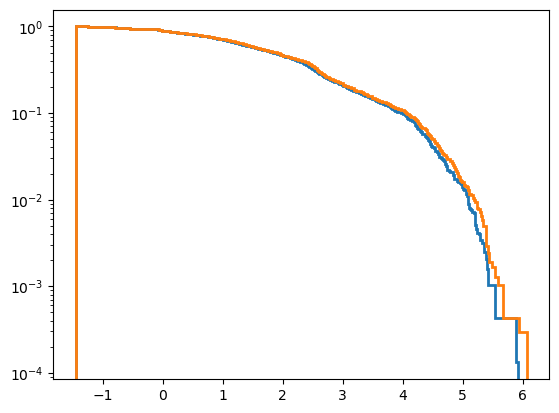

In [128]:
myval = plt.hist(np.log10(wsu_all['wsu_productsize_later_4x_uneven'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_productsize_later_4x_stepped2'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')

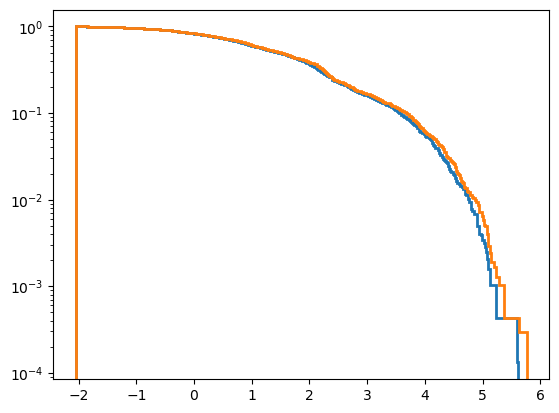

In [129]:
myval = plt.hist(np.log10(wsu_all['wsu_productsize_early_uneven'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_productsize_early_stepped2'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')

In [130]:
ratio = (wsu_all['wsu_productsize_early_uneven'].value)/(wsu_all['wsu_productsize_early_stepped2'].value)
idx = ratio > 1.5
wsu_all[idx]['mous','ntarget','imsize','wsu_nchan_spw_stepped2','wsu_cubesize_stepped2','wsu_cubesize_low','wsu_cubesize_high','wsu_nspw_early','mfssize','wsu_productsize_early_stepped2','wsu_productsize_early_uneven']

mous,ntarget,imsize,wsu_nchan_spw_stepped2,wsu_cubesize_stepped2,wsu_cubesize_low,wsu_cubesize_high,wsu_nspw_early,mfssize,wsu_productsize_early_stepped2,wsu_productsize_early_uneven
,,,,Gbyte,Gbyte,Gbyte,,Gbyte,Gbyte,Gbyte
str22,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
uid://A001/X1465/X2767,13.0,210.0,2795.0,0.493038,0.0,0.493038,8,0.0001764,39.458270399999996,102.5885952
uid://A001/X1465/X276d,5.0,185.0,2795.0,0.3826355,0.0,0.3826355,8,0.0001369,19.3751616,30.621792
uid://A001/X1465/Xbc,18.0,115.0,2795.0,0.1478555,0.0,0.1478555,8,5.29e-05,22.905950400000002,42.5976192
uid://A001/X1465/Xc0,22.0,220.0,2795.0,0.541112,0.0,0.541112,8,0.0001936,48.347313599999985,190.5395712
uid://A001/X14c3/X129c,2.0,530.0,29629.0,33.2911444,0.0,33.2911444,8,0.0011236,551.639488,1065.352576
uid://A001/X1590/X223e,2.0,270.0,29629.0,8.6398164,0.0,8.6398164,8,0.0002916,175.4096,276.48345600000005
uid://A001/X1590/X27d7,2.0,340.0,29629.0,13.7004496,0.0,13.7004496,8,0.0004624,226.041344,438.429184
uid://A001/X1590/X27dd,2.0,350.0,29629.0,14.51821,0.0,14.51821,8,0.00049,239.12595199999998,464.59839999999997


Hmmmm.... something like the mous target roll up isn't working. I'm calculating the productsize here directly per mous, but earlier I was aggregating. I'm wondering if something went wrong in the aggregation>.

In [131]:
13.0*2.0*(0.493038+0.0001764)*8

102.5885952

In [132]:
idx = wsu_all_src['mous'] == 'uid://A001/X1465/X2767'
print(np.sum(wsu_all_src[idx]['wsu_productsize_early_stepped2']))
print(np.sum(wsu_all_src[idx]['wsu_cubesize_stepped2']))
wsu_all_src[idx]['mous','ntarget','imsize','target_name','wsu_nchan_spw_stepped2','wsu_cubesize_stepped2','wsu_nspw_early','wsu_productsize_early_stepped2']

39.458270399999996 Gbyte
2.4652598749999997 Gbyte


mous,ntarget,imsize,target_name,wsu_nchan_spw_stepped2,wsu_cubesize_stepped2,wsu_nspw_early,wsu_productsize_early_stepped2
,,,,,Gbyte,,Gbyte
str22,float64,float64,str33,float64,float64,int64,float64
uid://A001/X1465/X2767,13.0,115.0,ESO_482G_035,2795.0,0.1478555,8,2.3665344
uid://A001/X1465/X2767,13.0,110.0,ESO_549-G018,2795.0,0.135278,8,2.1652224
uid://A001/X1465/X2767,13.0,105.0,IC_1952,2795.0,0.1232595,8,1.9728576
uid://A001/X1465/X2767,13.0,110.0,NGC1415,2795.0,0.135278,8,2.1652224
uid://A001/X1465/X2767,13.0,110.0,NGC1422,2795.0,0.135278,8,2.1652224
uid://A001/X1465/X2767,13.0,165.0,NGC_1255,2795.0,0.3043755,8,4.871750400000001
uid://A001/X1465/X2767,13.0,135.0,NGC_1292,2795.0,0.2037555,8,3.2612544
uid://A001/X1465/X2767,13.0,137.5,NGC_1385,2795.0,0.211371875,8,3.3831599999999997


The difference comes from taking the max imsize per mous. For a particular source, the values range from 95 to 210. When I roll up I take the max (210). So that's leading to the different cube size for the rolled up MOUS values and the values calculated per mous. To be strictly consistent, I probably should calculate the value per source and the aggregate per mous.

It looks like all the affected mouses have relatively tiny imsizes.

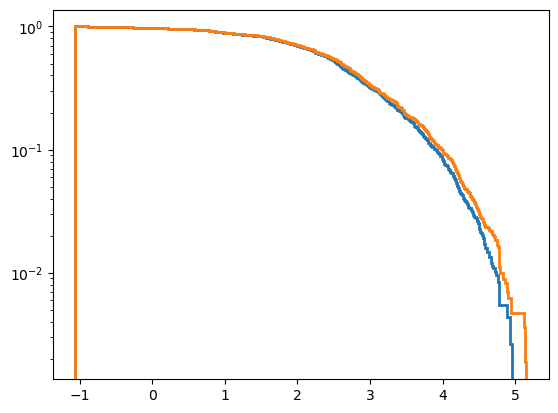

In [148]:
myval = plt.hist(np.log10(wsu_all['wsu_datavol_later_4x_uneven_typical_total'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_datavol_later_4x_stepped2_typical_total'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='orig')

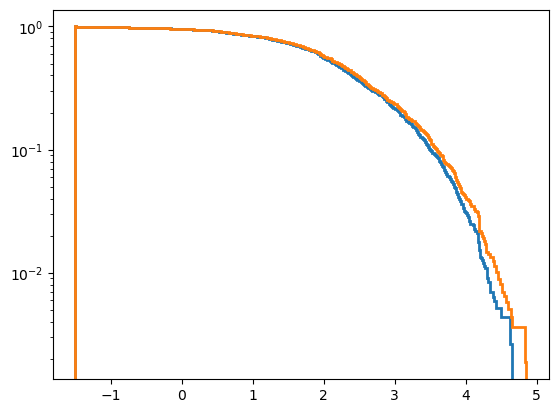

In [149]:
myval = plt.hist(np.log10(wsu_all['wsu_datavol_early_uneven_typical_total'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_datavol_early_stepped2_typical_total'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='orig')

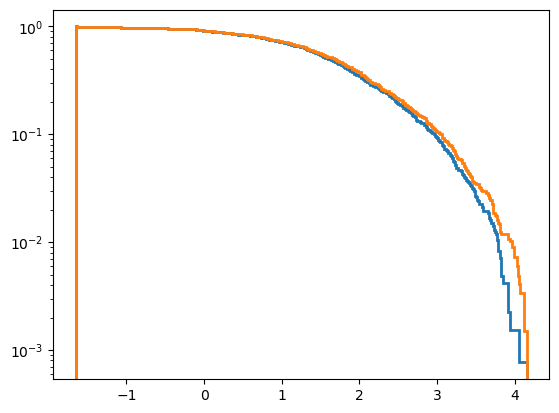

In [151]:
myval = plt.hist(np.log10(wsu_all['wsu_datavol_early_uneven_typical_cal'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_datavol_early_stepped2_typical_cal'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='orig')

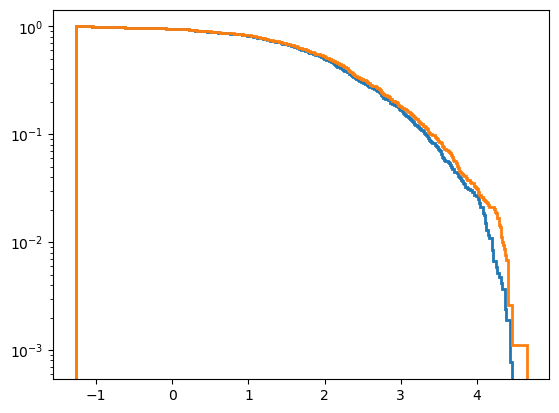

In [152]:
myval = plt.hist(np.log10(wsu_all['wsu_datavol_later_4x_uneven_typical_cal'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_datavol_later_4x_stepped2_typical_cal'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='orig')

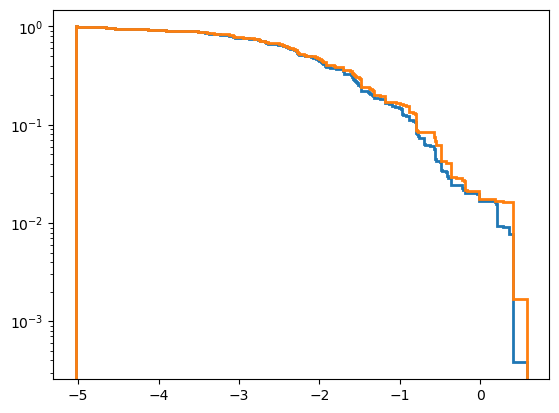

In [153]:
myval = plt.hist(np.log10(wsu_all['wsu_sysperf_early_uneven_typical_aprojonly'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_sysperf_early_stepped2_typical_aprojonly'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='orig')

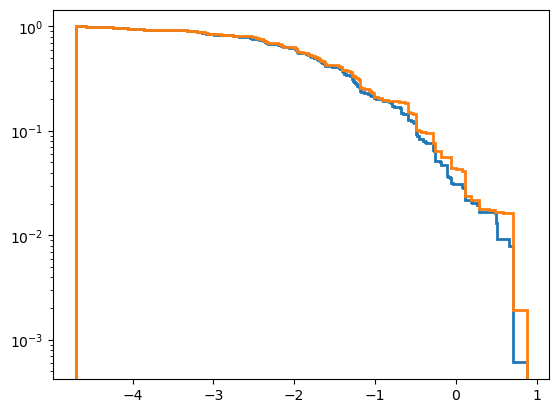

In [154]:
myval = plt.hist(np.log10(wsu_all['wsu_sysperf_later_4x_uneven_typical_aprojonly'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='uneven')
myval2 = plt.hist(np.log10(wsu_all['wsu_sysperf_later_4x_stepped2_typical_aprojonly'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='orig')

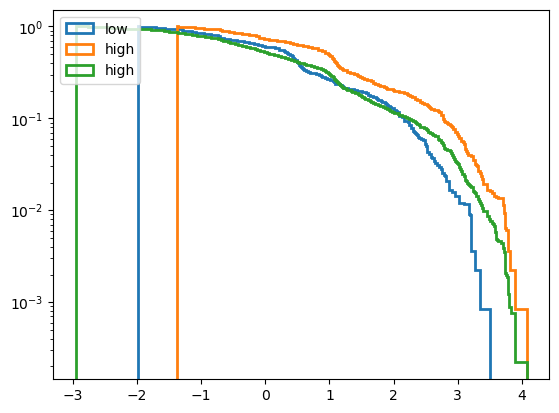

In [158]:
idx = wsu_all['wsu_uneven_samp'] == True
myval = plt.hist(np.log10(wsu_all['wsu_cubesize_low'][idx].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'][idx],linewidth=2,label='low')
myval = plt.hist(np.log10(wsu_all['wsu_cubesize_high'][idx].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'][idx],linewidth=2,label='high')
myval = plt.hist(np.log10(wsu_all['wsu_cubesize_stepped2'].value),cumulative=-1,histtype='step',
         bins=500,log=True, density=True,weights=wsu_all['weights_all'],linewidth=2,label='high')
plt.legend()

In [21]:
idx = (wsu_all['wsu_uneven_samp'] == True) & (wsu_all['blc_velres']<0.11 *u.km/u.s) & (wsu_all['blc_velres']>0.095 *u.km/u.s)
wsu_all[idx]['wsu_velres_stepped2','wsu_velres_low','wsu_velres_high']

wsu_velres_stepped2,wsu_velres_low,wsu_velres_high
km / s,km / s,km / s
float64,float64,float64
0.14438439694878774,0.14438455068149403,0.14438439694878774
0.14438422637431858,0.14438432398082943,0.14438422637431858
0.1443842941926588,0.1443843608433315,0.1443842941926588
0.14438432387627329,0.14438438080491212,0.14438432387627329
0.1197073539976908,0.49080015139053224,0.1197073539976908
0.11970734875878698,0.4908001299110267,0.11970734875878698
...,...,...
0.11689898038045958,0.4968206666169533,0.11689898038045958


## Running a monte carlo

In [164]:
reload(wsu_db)
wsu_db.generate_uneven_spw_realizations(wsu_all,outDir='data/sample_uneven_spws',
                                        filename='wsu_datarate_mit_per_mous_uneven_spws_20240119',
                                        n=50)

-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_000.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_001.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_002.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_003.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_004.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_005.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_006.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_007.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_008.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_mous_uneven_spws_20240119_009.ecsv
-------------
data/sample_uneven_spws/wsu_datarate_mit_per_m

## Calculating aggregate statistics

In [ ]:
# 'wsu_uneven_samp','wsu_velres_low','wsu_specwidth_low','wsu_chanavg_low',
#'wsu_nspw_low_early','wsu_nspw_low_later_4x','wsu_nchan_spw_low',
#'wsu_velres_high','wsu_specwidth_high','wsu_chanavg_high',
# 'wsu_nspw_high_early','wsu_nspw_high_later_4x',
# 'wsu_nchan_spw_high','wsu_nchan_agg_uneven_early','wsu_nchan_agg_uneven_later_4x',
# 'wsu_datarate_early_uneven_typical','wsu_visrate_early_uneven_typical',
#'wsu_datavol_early_uneven_typical_target_tot','wsu_datavol_early_uneven_typical_cal',
# 'wsu_datavol_early_uneven_typical_total','wsu_nvis_early_uneven_typical_target_tot',
# 'wsu_nvis_early_uneven_typical_cal','wsu_nvis_early_uneven_typical_total',
# 'wsu_datarate_later_4x_uneven_typical','wsu_visrate_later_4x_uneven_typical',
# 'wsu_datavol_later_4x_uneven_typical_target_tot',
# 'wsu_datavol_later_4x_uneven_typical_cal','wsu_datavol_later_4x_uneven_typical_total',
# 'wsu_nvis_later_4x_uneven_typical_target_tot','wsu_nvis_later_4x_uneven_typical_cal',
# 'wsu_nvis_later_4x_uneven_typical_total','wsu_cubesize_low','wsu_cubesize_high',
# 'wsu_productsize_early_uneven','wsu_productsize_later_4x_uneven',
# 'wsu_sysperf_early_uneven_typical_aprojonly',
# 'wsu_sysperf_later_4x_uneven_typical_aprojonly'

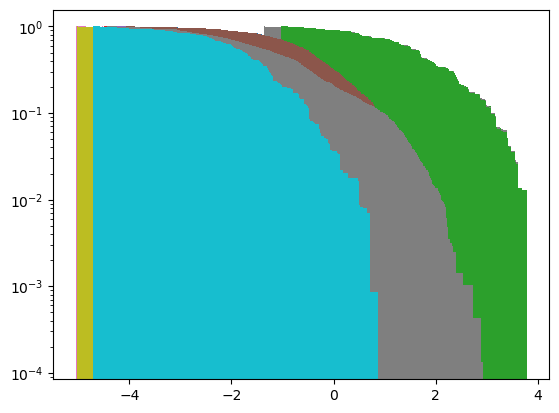

In [168]:
quantity_list = ['wsu_productsize_early_uneven',                                  
                 'wsu_datarate_early_uneven_typical', # typical number of antennas
                 'wsu_visrate_early_uneven_typical',                                  
                 'wsu_datavol_early_uneven_typical_target_tot',
                 'wsu_datavol_early_uneven_typical_cal',
                 'wsu_datavol_early_uneven_typical_total',
                 'wsu_productsize_later_4x_uneven',                                  
                 'wsu_datarate_later_4x_uneven_typical',
                 'wsu_visrate_later_4x_uneven_typical',                                  
                 'wsu_datavol_later_4x_uneven_typical_target_tot',
                 'wsu_datavol_later_4x_uneven_typical_cal',
                 'wsu_datavol_later_4x_uneven_typical_total',
                 'wsu_productsize_later_4x_uneven',                                  
                 'wsu_sysperf_early_uneven_typical_allgrid',
                 'wsu_sysperf_later_2x_uneven_typical_allgrid',
                 'wsu_sysperf_later_4x_stepped2_typical_allgrid',
                 'wsu_sysperf_early_uneven_typical_aprojonly',
                 'wsu_sysperf_later_2x_uneven_typical_aprojonly',
                 'wsu_sysperf_later_4x_uneven_typical_aprojonly']
reload(wsu_db)
myresults = wsu_db.calculate_dist(outDir='data/sample_uneven_spws',
                     filename='wsu_datarate_mit_per_mous_uneven_spws_20240119',
                     nbins=500,
                     quantity_list = quantity_list)


In [169]:
myresults

{'hist_cumulative': {'wsu_sysperf_later_4x_stepped2_typical_allgrid': {'bins': array([-4.70488951e+00, -4.69373196e+00, -4.68257441e+00, -4.67141686e+00,
          -4.66025931e+00, -4.64910176e+00, -4.63794422e+00, -4.62678667e+00,
          -4.61562912e+00, -4.60447157e+00, -4.59331402e+00, -4.58215647e+00,
          -4.57099892e+00, -4.55984137e+00, -4.54868383e+00, -4.53752628e+00,
          -4.52636873e+00, -4.51521118e+00, -4.50405363e+00, -4.49289608e+00,
          -4.48173853e+00, -4.47058099e+00, -4.45942344e+00, -4.44826589e+00,
          -4.43710834e+00, -4.42595079e+00, -4.41479324e+00, -4.40363569e+00,
          -4.39247814e+00, -4.38132060e+00, -4.37016305e+00, -4.35900550e+00,
          -4.34784795e+00, -4.33669040e+00, -4.32553285e+00, -4.31437530e+00,
          -4.30321775e+00, -4.29206021e+00, -4.28090266e+00, -4.26974511e+00,
          -4.25858756e+00, -4.24743001e+00, -4.23627246e+00, -4.22511491e+00,
          -4.21395736e+00, -4.20279982e+00, -4.19164227e+00, -4.18

In [170]:
# save results
import os
pickle.dump(myresults,open(os.path.join('data/sample_uneven_spws',
                                        'wsu_datarates_mit_per_mous_uneven_spws_20240119'+"_agg.pkl"),'wb'))